## 1. Tạo 1 dataset gồm 10 điểm dữ liệu sinh từ hàm y=x^2+noise. Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Thử thêm 100 điểm dữ liệu nữa xem hàm đa thức bậc 9 sẽ như thế nào?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Khởi tạo bộ dữ liệu

np.random.seed(0)
X_200 = [i for i in range(0,200)]
X_20 = [i for i in range(0,200)]
np.random.shuffle(X_200)
Y_200 = np.power(X_200,2) + np.random.normal(-2,2,200)

X_10 = X_200[:10]
Y_10 = Y_200[:10]
print(X_10)
print(Y_10)

[18, 170, 107, 98, 177, 182, 5, 146, 12, 152]
[3.21022076e+02 2.88972402e+04 1.14475195e+04 9.59863730e+03
 3.13251664e+04 3.31217616e+04 2.21074454e+01 2.13097133e+04
 1.42020076e+02 2.31008836e+04]


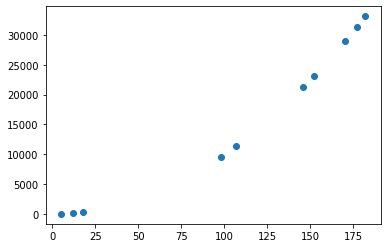

In [ ]:
plt.scatter(X_10,Y_10)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X_10 = np.reshape(X_10,(-1,1))
Y_10 = np.reshape(Y_10,(-1,1))
polynomial_features= PolynomialFeatures(degree=9)
X_poly = polynomial_features.fit_transform(X_10)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, Y_10)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

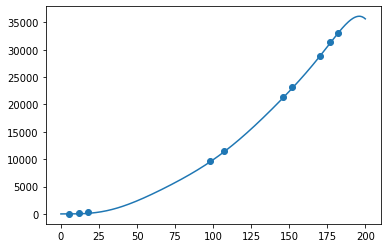

In [ ]:
x = np.linspace(0, 200, 400)
coeffs = model.coef_
y = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x])
plt.scatter(X_10,Y_10)
plt.plot(x, y)
plt.show()

In [ ]:
X_110 = X_200[0:110]
Y_110 = Y_200[0:110]
X_110 = np.reshape(X_110,(-1,1))
Y_110 = np.reshape(Y_110,(-1,1))
polynomial_features= PolynomialFeatures(degree=9)
X_poly = polynomial_features.fit_transform(X_110)

In [ ]:
model = LinearRegression()
model.fit(X_poly, Y_110)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

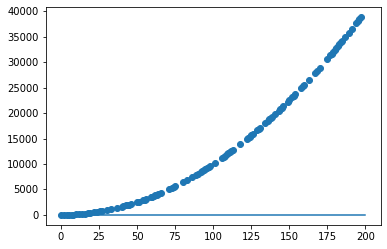

In [ ]:
x = np.linspace(0, 200, 400)
coeffs = model.coef_
y = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x])
plt.scatter(X_110,Y_110)
plt.plot(x, y)
plt.show()

## Implement hàm tính convolution, input X, W, stride, padding, output Y. Implement hàm sobel (https://docs.opencv.org/.../sob.../sobel_derivatives.html...)

In [ ]:
#Conv layer
import numpy as np

def conv2D(img, kernel, padding=0, strides=1):

    # Height, Width của kernel và image
    h_k = kernel.shape[0]
    w_k = kernel.shape[1]
    h_x = img.shape[0]
    w_x = img.shape[1]

    # Shape ouput
    h_out = int(((h_x - h_k + 2 * padding) / strides) + 1)
    w_out = int(((w_x - w_k + 2 * padding) / strides) + 1)
    output = np.zeros((h_out, w_out))

    # Padding ảnh gốc
    img_pad = []
    if padding != 0:
        img_pad = np.zeros((img.shape[0] + padding*2, img.shape[1] + padding*2))
        img_pad[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = img
        img = img_pad
    else :
        img_pad = img
    
    # Trượt kernel
    for w in range(img_pad.shape[1]):
        if w > img_pad.shape[1] - w_k:
            break
        if w % strides == 0:
            for h in range(img_pad.shape[0]):
                if h > img_pad.shape[0] - h_k:
                    break
                try:
                    if h % strides == 0:
                        output[x, y] = (kernel * img_pad[h: h + h_k , w: w + w_k]).sum()
                except:
                    break

    return output


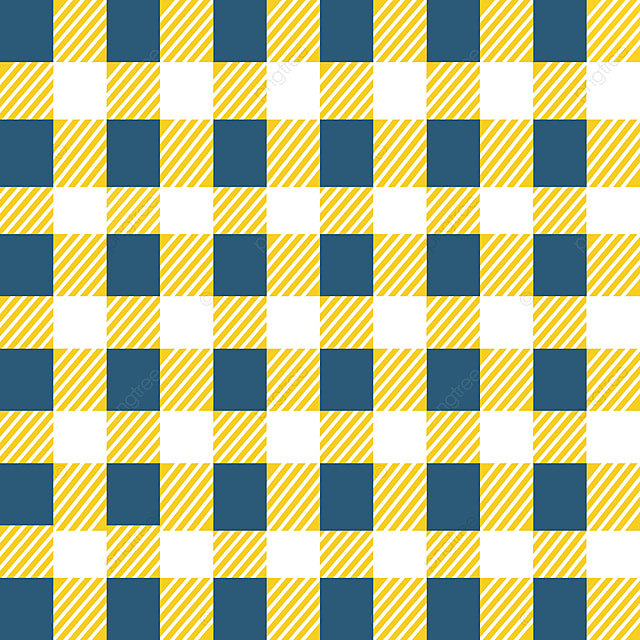

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
  
# Load ảnh
image = cv2.imread('/content/drive/MyDrive/pngtree-diagonal-checkered-plaid-seamless-pattern-png-image_2111185.jpg')
# Plot ảnh gốc
cv2_imshow(image)
# Convert ảnh BGR thành ảnh xám
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

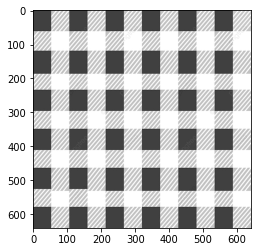

In [ ]:
# Plot ảnh sau khi chuyển thành màu xám
plt.imshow(image,cmap='gray')

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  79.  79. ... 254. 252.   0.]
 [  0.  79.  79. ... 253. 255.   0.]
 ...
 [  0.  79.  79. ... 200. 199.   0.]
 [  0.  79.  79. ... 198. 198.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


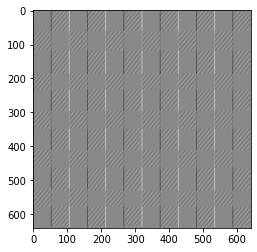

In [ ]:
# X_Sobel
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
output_x = convolve2D(image, kernel_x, padding=1)
plt.imshow(output_x,cmap='gray')

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  79.  79. ... 254. 252.   0.]
 [  0.  79.  79. ... 253. 255.   0.]
 ...
 [  0.  79.  79. ... 200. 199.   0.]
 [  0.  79.  79. ... 198. 198.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


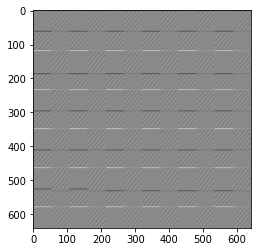

In [ ]:
# Y_Sobel
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
output_y = convolve2D(image, kernel_y, padding=1)
plt.imshow(output_y,cmap='gray')

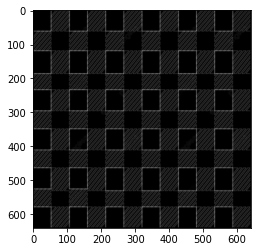

In [ ]:
# Sobel
output_xy = np.abs(output_x) + np.abs(output_y)
plt.imshow(output_xy,cmap='gray')

## 3. Hiểu code mẫu, chỉnh hyper như lr, optimizer, kernel size, số kernel,.... So sánh các kết quả.

In [ ]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.optimizers import Adam

In [ ]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)
print(X_val.shape)

11501568/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)
(10000, 28, 28)


In [ ]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.
print(X_train.shape)

(50000, 28, 28, 1)


In [ ]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Model gốc

# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))

# Thêm Max pooling layer
model.add(MaxPooling2D())

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='relu'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 703,210
Trainable params: 703,210
Non-trainable params: 0
__________________________________________________

In [ ]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 21s 4ms/step - loss: 0.2919 - accuracy: 0.9113 - val_loss: 0.0592 - val_accuracy: 0.9821
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.0480 - val_accuracy: 0.9858
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.0490 - val_accuracy: 0.9864
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0520 - val_accuracy: 0.9873
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.0429 - val_accuracy: 0.9891
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0087 - accuracy: 0.9968 - val_loss: 0.0436 - val_accuracy: 0.9900
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0712 - val_accuracy

In [ ]:
# Model với gấp đôi số kernel 
# 5. Định nghĩa model
model_1 = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))

# Thêm Convolutional layer
model_1.add(Conv2D(64, (3, 3), activation='relu'))

# Thêm Max pooling layer
model_1.add(MaxPooling2D())

# Flatten layer chuyển từ tensor sang vector
model_1.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model_1.add(Dense(128, activation='relu'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model_1.add(Dense(10, activation='softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,423,434
Trainable params: 1,423,434
Non-trainable params: 0
____________________________________________

In [ ]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
H_1 = model_1.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2620 - accuracy: 0.9160 - val_loss: 0.0598 - val_accuracy: 0.9813
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0481 - val_accuracy: 0.9859
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0223 - accuracy: 0.9924 - val_loss: 0.0455 - val_accuracy: 0.9879
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0487 - val_accuracy: 0.9860
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0096 - accuracy: 0.9963 - val_loss: 0.0531 - val_accuracy: 0.9869
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0477 - val_accuracy: 0.9891
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.0518 - val_accuracy:

In [ ]:
# Model sử dụng size kernel 5x5
# 5. Định nghĩa model
model_2 = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model_2.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28,28,1)))

# Thêm Convolutional layer
model_2.add(Conv2D(32, (5, 5), activation='relu'))

# Thêm Max pooling layer
model_2.add(MaxPooling2D())

# Flatten layer chuyển từ tensor sang vector
model_2.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model_2.add(Dense(128, activation='relu'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 617,706
Trainable params: 617,706
Non-trainable params: 0
________________________________________________

In [ ]:
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
H_2 = model_2.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 0.2564 - accuracy: 0.9185 - val_loss: 0.0556 - val_accuracy: 0.9835
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0403 - accuracy: 0.9864 - val_loss: 0.0444 - val_accuracy: 0.9889
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0443 - val_accuracy: 0.9888
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0405 - val_accuracy: 0.9899
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0121 - accuracy: 0.9956 - val_loss: 0.0535 - val_accuracy: 0.9887
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0098 - accuracy: 0.9965 - val_loss: 0.0536 - val_accuracy: 0.9892
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0585 - val_accuracy:

In [ ]:
# Model sử dụng optimizer SGD
# 5. Định nghĩa model
model_3 = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model_3.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))

# Thêm Convolutional layer
model_3.add(Conv2D(32, (3, 3), activation='relu'))

# Thêm Max pooling layer
model_3.add(MaxPooling2D())

# Flatten layer chuyển từ tensor sang vector
model_3.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model_3.add(Dense(128, activation='relu'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model_3.add(Dense(10, activation='softmax'))

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 703,210
Trainable params: 703,210
Non-trainable params: 0
________________________________________________

In [ ]:
model_3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
H_3 = model_3.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7944 - accuracy: 0.7680 - val_loss: 0.1840 - val_accuracy: 0.9480
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1892 - accuracy: 0.9430 - val_loss: 0.1424 - val_accuracy: 0.9597
Epoch 3/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.1381 - accuracy: 0.9581 - val_loss: 0.1114 - val_accuracy: 0.9693
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1093 - accuracy: 0.9672 - val_loss: 0.0996 - val_accuracy: 0.9709
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0877 - accuracy: 0.9735 - val_loss: 0.0929 - val_accuracy: 0.9730
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0775 - accuracy: 0.9764 - val_loss: 0.0942 - val_accuracy: 0.9729
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9794 - val_loss: 0.0778 - val_accuracy:

<Figure size 432x288 with 0 Axes>

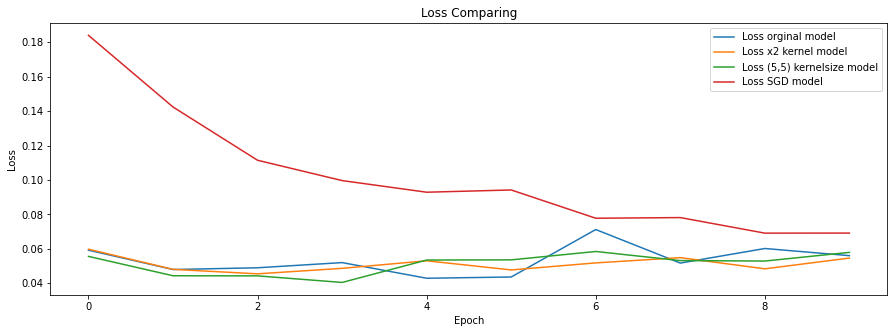

In [ ]:
# 8. Vẽ đồ thị so sánh loss giữa các model
fig = plt.figure()
plt.figure(figsize=(15,5))
numOfEpoch = 10
# plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='Loss orginal model')
plt.plot(np.arange(0, numOfEpoch), H_1.history['val_loss'], label='Loss x2 kernel model')
plt.plot(np.arange(0, numOfEpoch), H_2.history['val_loss'], label='Loss (5,5) kernelsize model')
plt.plot(np.arange(0, numOfEpoch), H_3.history['val_loss'], label='Loss SGD model')
# plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
# plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Loss Comparing')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

<Figure size 432x288 with 0 Axes>

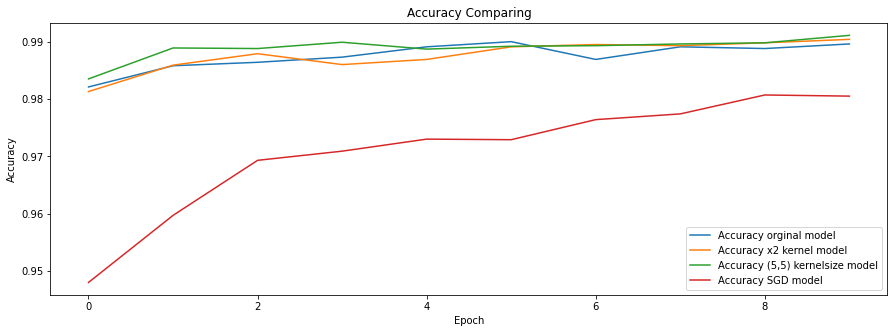

In [ ]:
# 9. Vẽ đồ thị so sánh accuracy giữa các model
fig = plt.figure()
plt.figure(figsize=(15,5))
numOfEpoch = 10
# plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='Accuracy orginal model')
plt.plot(np.arange(0, numOfEpoch), H_1.history['val_accuracy'], label='Accuracy x2 kernel model')
plt.plot(np.arange(0, numOfEpoch), H_2.history['val_accuracy'], label='Accuracy (5,5) kernelsize model')
plt.plot(np.arange(0, numOfEpoch), H_3.history['val_accuracy'], label='Accuracy SGD model')
# plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
# plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy Comparing')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## 4. Build model tương tự VGG16 (có thể nông hơn) cho cifar10.

In [ ]:
# Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10

In [ ]:
# Load dữ liệu cifar
(X_train, Y_train), (X_val, Y_val) = cifar10.load_data()

In [ ]:
# Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train/255.
# X_test = X_test/255.
X_val = X_val/255.
print(X_train.shape)

(50000, 32, 32, 3)


In [ ]:
# One hot encoding label (Y)
y_train = to_categorical(Y_train, 10)
y_val = to_categorical(Y_val, 10)
# Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', Y_train[0])
print('Dữ liệu y sau one-hot encoding ',y_train[0])

Dữ liệu y ban đầu  [6]
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# Model CNN đơn giản
model = Sequential()

# First Conv layer
model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Second Conv layer
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Third Conv layer
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Fourth Conv layer
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Fifth Conv layer
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 80 nodes và dùng hàm relu
model.add(Dense(80, activation='relu'))
# Dropout
model.add(Dropout(0.3))
# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Thực hiện train model với data
import tensorflow as tf

# early stop
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Fit model
H = model.fit(X_train, y_train, validation_data=(X_val, y_val),
          batch_size=128, epochs=200,callbacks=[callback], verbose=1)

Epoch 1/200
391/391 [==============================] - 22s 15ms/step - loss: 2.1241 - accuracy: 0.1867 - val_loss: 1.5214 - val_accuracy: 0.4274
Epoch 2/200
391/391 [==============================] - 5s 12ms/step - loss: 1.5520 - accuracy: 0.4218 - val_loss: 1.2752 - val_accuracy: 0.5377
Epoch 3/200
391/391 [==============================] - 5s 12ms/step - loss: 1.3436 - accuracy: 0.5106 - val_loss: 1.1823 - val_accuracy: 0.5824
Epoch 4/200
391/391 [==============================] - 5s 12ms/step - loss: 1.2425 - accuracy: 0.5560 - val_loss: 1.0440 - val_accuracy: 0.6392
Epoch 5/200
391/391 [==============================] - 5s 12ms/step - loss: 1.1519 - accuracy: 0.5904 - val_loss: 0.9754 - val_accuracy: 0.6568
Epoch 6/200
391/391 [==============================] - 5s 12ms/step - loss: 1.0863 - accuracy: 0.6183 - val_loss: 0.9471 - val_accuracy: 0.6730
Epoch 7/200
391/391 [==============================] - 5s 12ms/step - loss: 1.0472 - accuracy: 0.6345 - val_loss: 0.8855 - val_accuracy

<Figure size 432x288 with 0 Axes>

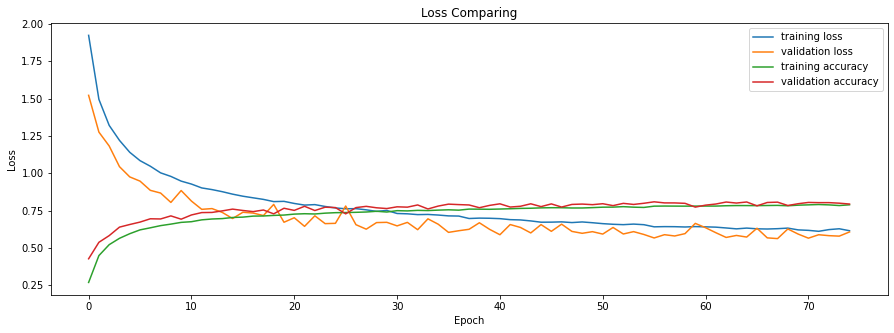

In [ ]:
# Visualize Loss và Accuracy của model CNN 

fig = plt.figure()
plt.figure(figsize=(15,5))
numOfEpoch = 75
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='training accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Loss Comparing')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# Model VGG-16
model = Sequential()

# Block-1
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# Block-2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Block-3
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Block-4
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Block-5
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Flatten layer
model.add(Flatten())
#Fully Connected layer
model.add(Dense(4096,activation="relu"))
model.add(Dense(4096,activation="relu"))

#Ouput layer
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 256)        

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Thực hiện train model với data
import tensorflow as tf

# early stop
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Fit model
H = model.fit(X_train, y_train, validation_data=(X_val, y_val),
          batch_size=128, epochs=200,callbacks=[callback], verbose=1)

Epoch 1/200
391/391 [==============================] - 30s 69ms/step - loss: 2.3030 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/200
391/391 [==============================] - 23s 60ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/200
391/391 [==============================] - 23s 60ms/step - loss: 2.3026 - accuracy: 0.1014 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/200
391/391 [==============================] - 25s 64ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/200
391/391 [==============================] - 24s 61ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/200
391/391 [==============================] - 24s 61ms/step - loss: 2.3026 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/200
391/391 [==============================] - 24s 61ms/step - loss: 2.3027 - accuracy: 0.0946 - val_loss: 2.3026 - val_ac

<Figure size 432x288 with 0 Axes>

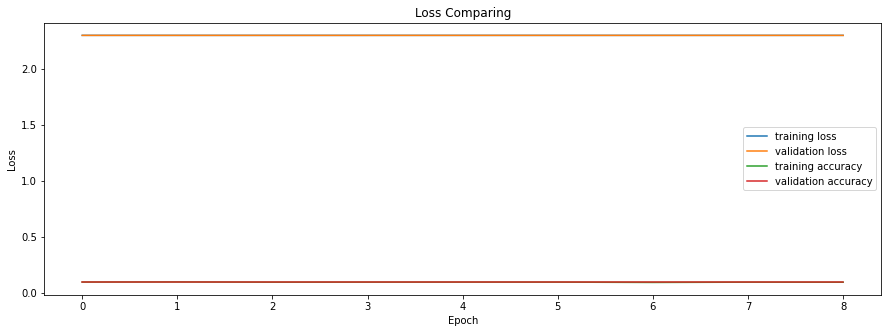

In [ ]:
# Visualize Loss và Accuracy của model CNN 

fig = plt.figure()
plt.figure(figsize=(15,5))
numOfEpoch = 9
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='training accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Loss Comparing')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

+ Có thể thấy rằng mô hình VGG-16 là mạng CNN có nhiều layer conv, như vậy có thể dẫn đến hiện tượng Gradient Vanishing

## 5. Tại sao khi build model, càng sâu thì width, height giảm nhưng depth tăng ?

+ Kích thước layer giảm dần :  Các nghiên cứu đã chỉ ra rằng việc kích thước layer giảm dần giúp giảm thiểu số lượng tham số của mô hình đáng kể và giúp tạo ra những mạng có kích thước nhẹ hơn và tốc độ dự báo nhanh hơn. Trong khi độ chính xác của mô hình giảm không đáng kể.
+ Độ sâu tầng layer tăng dần :  Độ sâu của kernel tăng làm độ sâu của layer tăng. Độ sâu tăng sẽ giúp cho mạng CNN học được đa dạng các đặc trưng hơn. Ở những layer đầu tiên là những đặc trưng chung, chúng khá giống nhau về hình dạng, phương hướng, nên không cần quá nhiều bộ lọc để tạo ra chúng với số lượng lớn. Càng ở những layers sau đòi hỏi độ chi tiết cao hơn thì yêu cầu số lượng bộ lọc nhiều hơn để giúp phân biệt được nhiều chi tiết đặc trưng hơn.